Training a decision Tree by Iterative Dicotimizer3

The test that reduce the most of uncertainity about classification are the best

We quantify the amount of uncertainity using the measure called entropy.It is given by- 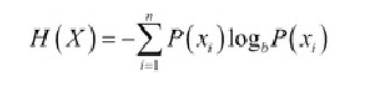


Gini Impuirty - Another heuristic of learning Decision tree is  Gini Impurity.It measures proportion of classes in a set -
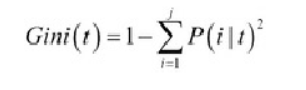

In [1]:
#Addblocker Example

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

C:\Users\asm1318\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\asm1318\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
df = pd.read_csv('ad.data',header=None)

C:\Users\asm1318\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df

,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,125,125,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3274,170,94,0.5529,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
3275,101,140,1.3861,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
3276,23,120,5.2173,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
3277,?,?,?,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.


In [5]:
explanatory_variable_columns = set(df.columns.values)

In [9]:
response_varaible_column = df[len(df.columns.values)-1]

In [10]:
explanatory_variable_columns.remove(len(df.columns.values)-1)

In [12]:
y = [1 if e == 'ad.' else 0 for e in response_varaible_column]
    

In [13]:
X = df[list(explanatory_variable_columns)]

In [16]:
#Missing Value Imputation with -1

X.replace(to_replace=' *\?', value=-1, regex=True, inplace=True)

C:\Users\asm1318\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4263: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [23]:
 X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3)


In [24]:
pipeline = Pipeline([
        ('clf', DecisionTreeClassifier(criterion='entropy'))])

In [28]:
parameters = {
        'clf__max_depth': (150, 155, 160),
        'clf__min_samples_split': (0.5, 0.7, 0.9),
        'clf__min_samples_leaf': (1, 2, 3)}

In [29]:
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, scoring='f1')

In [30]:
 grid_search.fit(X_train, y_train)

C:\Users\asm1318\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   18.2s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('clf',
                                        DecisionTreeClassifier(class_weight=None,
                                                               criterion='entropy',
                                                               max_depth=None,
                                                               max_features=None,
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                                               min_samples_leaf=1,
                                                               min_samples_split=2,
                                                               min_weight_fraction_leaf=0.0,
  

In [31]:
grid_search.best_score_

0.854436240762899

In [33]:
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print(param_name,best_parameters[param_name])

clf__max_depth 160
clf__min_samples_leaf 1
clf__min_samples_split 0.7


In [34]:
pred = grid_search.predict(X_test)

In [36]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       859
           1       0.82      0.82      0.82       125

    accuracy                           0.95       984
   macro avg       0.90      0.90      0.90       984
weighted avg       0.95      0.95      0.95       984

